In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout,Conv2D,MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [43]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
print(x_train[0].shape)
x_train[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

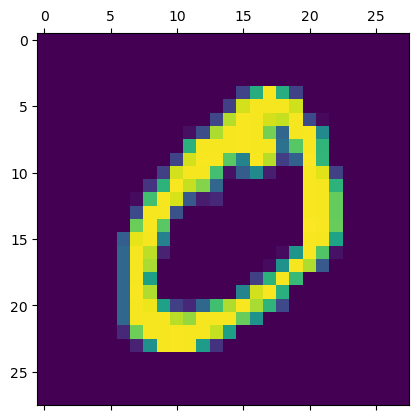

In [45]:
plt.matshow(x_train[1])

In [46]:
y_train[1]

0

In [47]:
# scaling the data
x_train = x_train/255.0
x_test = x_test/255.0

In [48]:
model = Sequential([
    BatchNormalization(input_shape=(28,28,1)),
    
    Conv2D(filters= 32, kernel_size=(5, 5),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    BatchNormalization(),
    Conv2D(filters= 32, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    
    BatchNormalization(),
    Conv2D(filters= 32, kernel_size=(2, 2), padding='same',activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),  
    BatchNormalization(),
    Dense(288,activation='relu'),
    
    Dropout(0.33),
    BatchNormalization(),
    Dense(128,activation='relu'),
    
    Dropout(0.33),
    BatchNormalization(),
    Dense(32,activation='relu'),
    
    Dropout(0.33),
    BatchNormalization(), 
    Dense(10,activation='softmax')
    
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_21 (Ba  (None, 28, 28, 1)         4         
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_22 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                      

In [50]:
#### Early stopping for preventing Overfitting
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [51]:
model_history=model.fit(x_train,y_train,
                        validation_split=0.2,batch_size=32,
                        epochs=150,callbacks=early_stopping)

Epoch 1/150
1500/1500 [==============================] - 154s 99ms/step - loss: 0.4460 - accuracy: 0.8749 - val_loss: 0.0585 - val_accuracy: 0.9829
Epoch 2/150
1500/1500 [==============================] - 153s 102ms/step - loss: 0.1644 - accuracy: 0.9577 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 3/150
1500/1500 [==============================] - 152s 102ms/step - loss: 0.1234 - accuracy: 0.9677 - val_loss: 0.0470 - val_accuracy: 0.9876
Epoch 4/150
1500/1500 [==============================] - 153s 102ms/step - loss: 0.1101 - accuracy: 0.9723 - val_loss: 0.0318 - val_accuracy: 0.9911
Epoch 5/150
1500/1500 [==============================] - 152s 101ms/step - loss: 0.1027 - accuracy: 0.9735 - val_loss: 0.0343 - val_accuracy: 0.9908
Epoch 6/150
1500/1500 [==============================] - 152s 102ms/step - loss: 0.0867 - accuracy: 0.9775 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 7/150
1500/1500 [==============================] - 152s 101ms/step - loss: 0.0807 - accuracy: 0.9786 

In [52]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

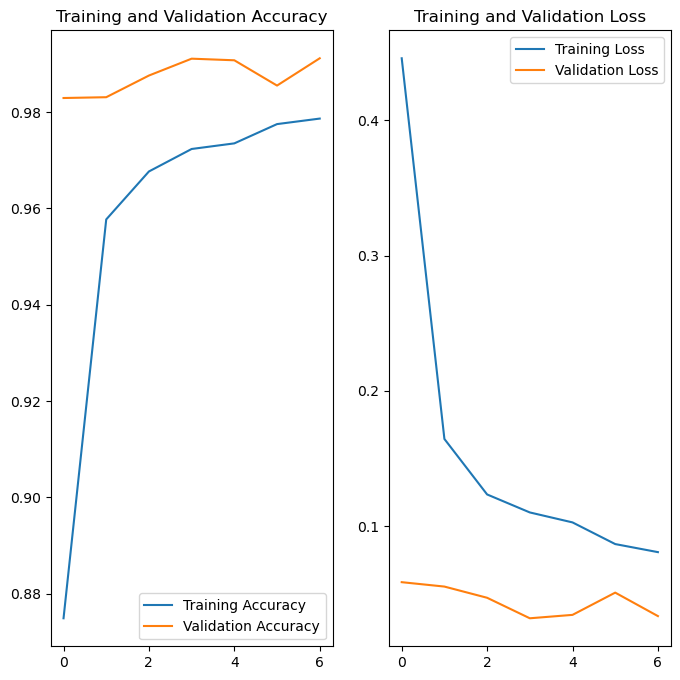

In [53]:
EPOCH=7
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 10s 30ms/step - loss: 0.0228 - accuracy: 0.9920


[0.022799910977482796, 0.9919999837875366]

313/313 [==============================] - 11s 33ms/step


Text(120.72222222222221, 0.5, 'Truth')

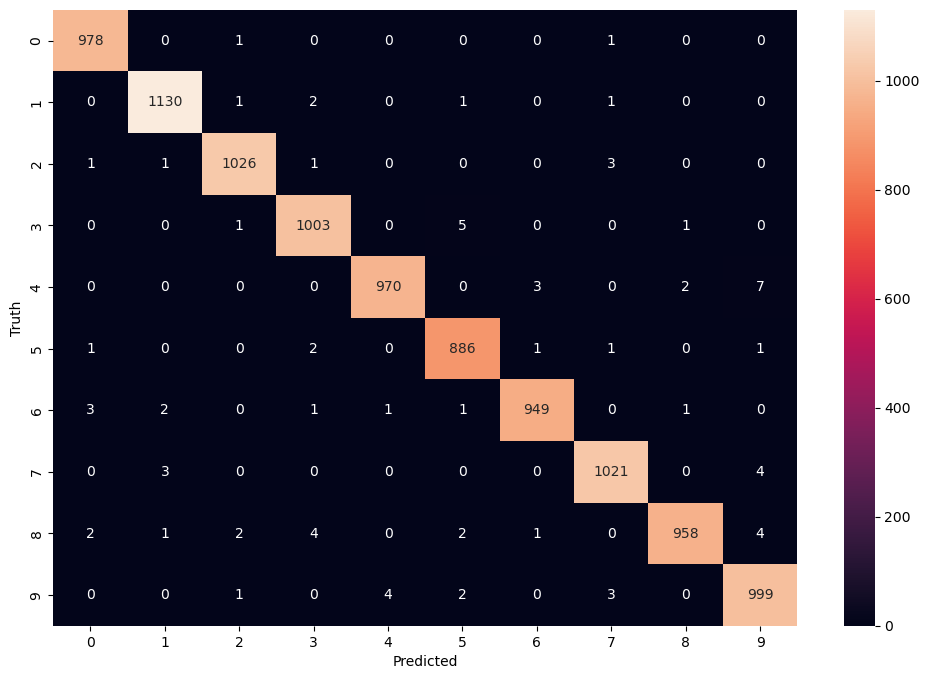

In [55]:
y_pred = model.predict(x_test)
y_pred_num = [np.argmax(element) for element in y_pred]

confussion_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_num)
plt.figure(figsize=(12,8))
sns.heatmap(confussion_mat,annot=True,fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
import pandas as pd
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_num})
result

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [59]:
##Saving the model
import os
model.save("./digit_recognizer.h5")